In [8]:
import pandas as pd
import numpy as np

sales = pd.read_csv('DEPT/백화점_하루매출.csv', sep=',')
sales = pd.DataFrame(sales.values[:10, -1], columns=['sales']) # 첫번째 행은 index라서
arr_sales = np.asarray(sales)
sales.head()

,sales
0,75.292573
1,85.756021
2,86.162663
3,81.170420
4,84.362377


In [9]:
all_pur = []
filename = 'DEPT/백화점_구매지수_1.csv' # 첫번째 행은 index라서
pur = pd.read_csv(filename)

for i in range(1, 11):
    filename = 'DEPT/백화점_구매지수_' + str(i) + '.csv' # 첫번째 열은 index라서
    pur = pd.read_csv(filename)
    pur = pur.iloc[:, 1:]
#     print(pur.shape) # 300, 200
    arr_pur = np.asarray(pur)
    arr_pur = arr_pur.reshape(300, 200, 1)
    all_pur.append(arr_pur)
    print(filename)
    
all_pur_arr = np.asarray(all_pur)
all_pur_arr.shape # 10, 300, 200, 1

DEPT/백화점_구매지수_1.csv
DEPT/백화점_구매지수_2.csv
DEPT/백화점_구매지수_3.csv
DEPT/백화점_구매지수_4.csv
DEPT/백화점_구매지수_5.csv
DEPT/백화점_구매지수_6.csv
DEPT/백화점_구매지수_7.csv
DEPT/백화점_구매지수_8.csv
DEPT/백화점_구매지수_9.csv
DEPT/백화점_구매지수_10.csv


(10, 300, 200, 1)

In [10]:
arr_sales.shape, all_pur_arr.shape

((10, 1), (10, 300, 200, 1))

In [11]:
pur.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.000000,0.291001,0.000000,0.930477,0.003941,0.633964,0.569072,0.752789,0.400658,...,0.910817,0.726576,0.700697,0.881426,0.000000,0.000000,0.988583,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.624758,0.000000,0.553240,0.000000,0.154412,0.000000,...,0.043313,0.000000,0.174381,0.277516,0.000000,0.000000,0.000000,0.0,0.302917,0.437671
2,0.985922,0.675851,0.312712,0.000000,0.000000,0.549046,0.163887,0.947048,0.000000,0.639319,...,0.000000,0.000000,0.000000,0.542946,0.153556,0.000000,0.000000,0.0,0.000000,0.000000
3,0.213916,0.328353,0.601851,0.827707,0.005857,0.000000,0.000000,0.281988,0.029297,0.160630,...,0.538907,0.000000,0.102391,0.413937,0.000000,0.584150,0.885567,0.0,0.405937,0.000000
4,0.603476,0.000000,0.982673,0.000000,0.870458,0.000000,0.000000,0.918388,0.195974,0.000000,...,0.000000,0.000000,0.946858,0.248631,0.349236,0.644714,0.842244,0.0,0.700378,0.645818


In [12]:
cnt = 1
sales_train = []
sales_valid = []
sales_test = []

for i in arr_sales:
    if cnt <= 3:
        sales_train.append(i)
    elif cnt > 3 and cnt <= 4:
        sales_valid.append(i)
    else:
        sales_test.append(i)
        
    print(cnt)
    cnt +=1
    
arr_sales_train = np.asarray(sales_train)
arr_sales_test = np.asarray(sales_test)
arr_sales_valid = np.asarray(sales_valid)

1
2
3
4
5
6
7
8
9
10


In [13]:
arr_sales_train.shape, arr_sales_valid.shape, arr_sales_test.shape

((3, 1), (1, 1), (6, 1))

In [14]:
cnt = 1
pur_train = []
pur_valid = []
pur_test = []

for i in all_pur_arr:
    if cnt <= 3:
        pur_train.append(i)
    elif cnt > 3 and cnt <= 4:
        pur_valid.append(i)
    else:
        pur_test.append(i)
        
    cnt +=1
    
arr_pur_train = np.asarray(pur_train)
arr_pur_test = np.asarray(pur_test)
arr_pur_valid = np.asarray(pur_valid)

In [15]:
arr_pur_train.shape, arr_pur_valid.shape, arr_pur_test.shape

((3, 300, 200, 1), (1, 300, 200, 1), (6, 300, 200, 1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

width = 300
height = 200

x_train, y_train = arr_pur_train, arr_sales_train
x_val, y_val = arr_pur_valid, arr_sales_valid
x_test, y_test = arr_pur_test, arr_sales_test

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

hist = model.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val))

Using TensorFlow backend.


Train on 3 samples, validate on 1 samples
Epoch 1/300
3/3 [==============================] - 1s 244ms/step - loss: 6822.9248 - val_loss: 1371.8585
Epoch 2/300
3/3 [==============================] - 1s 200ms/step - loss: 1427.2246 - val_loss: 868.0215
Epoch 3/300
3/3 [==============================] - 1s 216ms/step - loss: 911.6877 - val_loss: 1303.0099
Epoch 4/300
3/3 [==============================] - 1s 204ms/step - loss: 1395.4531 - val_loss: 238.1475
Epoch 5/300
3/3 [==============================] - 1s 197ms/step - loss: 282.8662 - val_loss: 31.2019
Epoch 6/300
3/3 [==============================] - 1s 201ms/step - loss: 36.4918 - val_loss: 334.0817
Epoch 7/300
3/3 [==============================] - 1s 210ms/step - loss: 333.6504 - val_loss: 495.4615
Epoch 8/300
3/3 [==============================] - 1s 229ms/step - loss: 497.7900 - val_loss: 401.6186
Epoch 9/300
3/3 [==============================] - 1s 213ms/step - loss: 403.1321 - val_loss: 168.6158
Epoch 10/300
3/3 [==========

Epoch 82/300
3/3 [==============================] - 1s 224ms/step - loss: 0.2122 - val_loss: 0.5706
Epoch 83/300
3/3 [==============================] - 1s 236ms/step - loss: 0.1400 - val_loss: 1.0232
Epoch 84/300
3/3 [==============================] - 1s 226ms/step - loss: 0.0126 - val_loss: 1.6831
Epoch 85/300
3/3 [==============================] - 1s 225ms/step - loss: 0.0322 - val_loss: 2.1576
Epoch 86/300
3/3 [==============================] - 1s 228ms/step - loss: 0.1259 - val_loss: 2.1073
Epoch 87/300
3/3 [==============================] - 1s 230ms/step - loss: 0.1141 - val_loss: 1.6150
Epoch 88/300
3/3 [==============================] - 1s 232ms/step - loss: 0.0238 - val_loss: 1.0632
Epoch 89/300
3/3 [==============================] - 1s 239ms/step - loss: 0.0086 - val_loss: 0.7378
Epoch 90/300
3/3 [==============================] - 1s 246ms/step - loss: 0.0712 - val_loss: 0.6996
Epoch 91/300
3/3 [==============================] - 1s 241ms/step - loss: 0.0839 - val_loss: 0.9248


Epoch 162/300
3/3 [==============================] - 1s 234ms/step - loss: 1.0782e-05 - val_loss: 1.2789
Epoch 163/300
3/3 [==============================] - 1s 220ms/step - loss: 5.0545e-05 - val_loss: 1.2759
Epoch 164/300
3/3 [==============================] - 1s 199ms/step - loss: 3.2962e-05 - val_loss: 1.2643
Epoch 165/300
3/3 [==============================] - 1s 202ms/step - loss: 1.0045e-06 - val_loss: 1.2533
Epoch 166/300
3/3 [==============================] - 1s 207ms/step - loss: 2.1841e-05 - val_loss: 1.2505
Epoch 167/300
3/3 [==============================] - 1s 237ms/step - loss: 3.5147e-05 - val_loss: 1.2572
Epoch 168/300
3/3 [==============================] - 1s 247ms/step - loss: 8.6839e-06 - val_loss: 1.2677
Epoch 169/300
3/3 [==============================] - 1s 223ms/step - loss: 3.9609e-06 - val_loss: 1.2742
Epoch 170/300
3/3 [==============================] - 1s 235ms/step - loss: 2.3837e-05 - val_loss: 1.2724
Epoch 171/300
3/3 [==============================] - 1s

3/3 [==============================] - 1s 222ms/step - loss: 1.8568e-08 - val_loss: 1.2635
Epoch 241/300
3/3 [==============================] - 1s 235ms/step - loss: 1.6104e-09 - val_loss: 1.2638
Epoch 242/300
3/3 [==============================] - 1s 221ms/step - loss: 5.2775e-09 - val_loss: 1.2639
Epoch 243/300
3/3 [==============================] - 1s 227ms/step - loss: 1.3931e-08 - val_loss: 1.2638
Epoch 244/300
3/3 [==============================] - 1s 220ms/step - loss: 4.9865e-09 - val_loss: 1.2636
Epoch 245/300
3/3 [==============================] - 1s 220ms/step - loss: 3.4925e-10 - val_loss: 1.2634
Epoch 246/300
3/3 [==============================] - 1s 257ms/step - loss: 6.6745e-09 - val_loss: 1.2634
Epoch 247/300
3/3 [==============================] - 1s 383ms/step - loss: 6.6745e-09 - val_loss: 1.2635
Epoch 248/300
3/3 [==============================] - 1s 336ms/step - loss: 8.7311e-10 - val_loss: 1.2637
Epoch 249/300
3/3 [==============================] - 1s 308ms/step - 

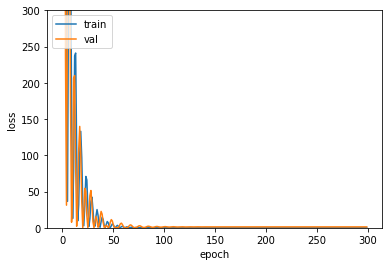

6/6 [==============================] - 0s 11ms/step
28.91304588317871


IndexError: index 6 is out of bounds for axis 0 with size 6

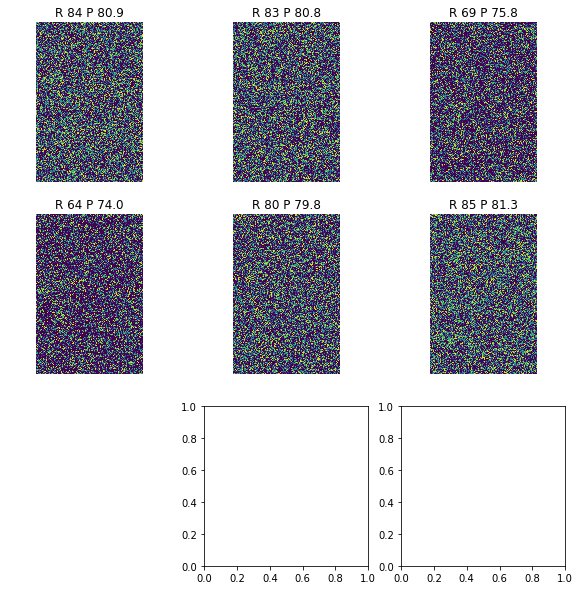

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 3
plt_col = 3

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[(int)(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()